# **About the dataset[<a href="https://www.kaggle.com/c/digit-recognizer/overview">src</a>]**
## **Description**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

**Acknowledgements**

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

# **Steps Involved**
1. Getting familier with dataset
2. Data Visualization
3. Data Preparation
4. Building and training the model
5. Model Evaluation
6. Performing prediction on unseen data
7. Miscellaneous

# **1. Getting Familier with dataset**

In [6]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pkg_resources
!pip install tensorflow==2.1.0
!pip install keras==2.3.1
import tensorflow as tf
import keras as ks
print(tf.__version__)
print(ks.__version__)
%matplotlib inline

#pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

2.1.0
2.3.1


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Checking for missing values in train set
train.isnull().sum().sum()

0

In [11]:
# Checking for missing values in test set
test.isnull().sum().sum()

0

# **2. Data Visualization**

## **a) Visualizing input Images**

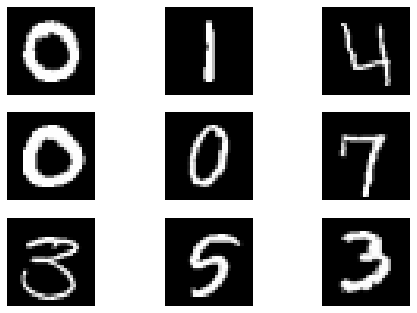

In [12]:
# Visualizing first 9 images of train set
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(train.drop('label',axis=1).iloc[i,:].values.reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.grid(False)
  plt.axis('off')

## **b) Checking label distribution**

In [13]:
# Separating label from train dataset
y_train = train.pop("label")

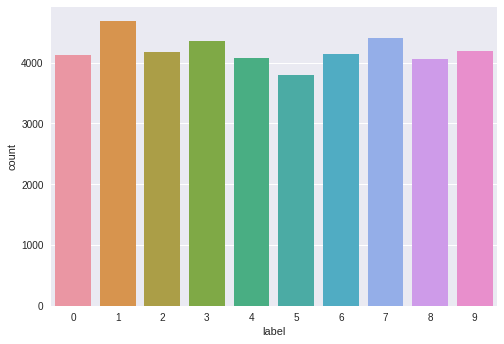

In [14]:
# Checking distribution of train labels
sns.countplot(y_train)
plt.show()

# **3. Data Preparation**

In [15]:
seed = 100
np.random.seed(seed)

## **a) Reshaping 1D image vector to 3D matrix**

In [16]:
print("Shape of train set",train.shape)
print("Shape of test set",test.shape)

Shape of train set (42000, 784)
Shape of test set (28000, 784)


Train and test images are stacked in the form of 1D vectors of 784 pixels (28px x 28px). Keras require images in the form of 3D matrix i.e. (height x width x channels). As MNIST images are gray scaled, there is only one channel (for RGB images channel = 3).

In [17]:
X_train = train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)

In [18]:
print("Shape of train set",X_train.shape)
print("Shape of test set",X_test.shape)

Shape of train set (42000, 28, 28, 1)
Shape of test set (28000, 28, 28, 1)


(-0.5, 27.5, 27.5, -0.5)

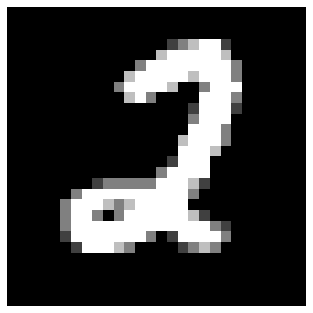

In [19]:
# Visualizing random image from the train matrix
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num][:,:,0], cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')

## **b) Normalization**

The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer.


1.    Normalization is performed on the Dataset to Scale the values within a Range. [0,1]
2.    This helps Gradient Descent to Converge much faster.
3.    Normalization is important to bring all the features to equal level and give all of them equal weigthage.
4.    Normalization helps remove distortions caused by Light and Shadows in an Image.

5.    Normalization is carried out as follows:

    x = (x - min) / (max - min) ; Here min=0 and max=255

In [20]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.
X_train = X_train / 255.0
X_test = X_test / 255.0

## **c) Separating data for validation set**

To measure model performance while training we can separate a small chunk of data. Since in our dataset labels are balanced and sample size contains 42000 images, using random split will not introduce any biasness. But with unbalanced dataset a simple random split could cause inaccurate evaluation during the validation. To avoid that, we could set stratify = True.

In [21]:
from sklearn.model_selection import train_test_split

valRatio = 0.1
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=valRatio, random_state=seed)

In [22]:
print("Shape of train set",X_train.shape)
print("Shape of validation set",X_validation.shape)
print("Shape of test set",X_test.shape)

Shape of train set (37800, 28, 28, 1)
Shape of validation set (4200, 28, 28, 1)
Shape of test set (28000, 28, 28, 1)


## **d) Data Augmentation**

Data Augmentation simply means increasing the number of Data points. in terms of Images it means the increasing number of images in the Dataset.

In order to avoid the overfitting problem, we need expand the dataset. This can be acheived by Rotating the Image, Flipping the Image, Zooming the Image, Changing light conditions, Cropping it etc. The more the data, the better our models would perform.

A CNN that can robustly classify objects even if its placed in different orientations is said to have the property called Invariance. In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

Click here to read more about Data Augmentation.
https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced

In [23]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

## **e) Output Label encoding**

As the output consists of 10 mutually exclusive classes, one-hot encoding is performed.

In [24]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)
print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# **4. Building and training the model**

In [25]:
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


## **a) Building the model**

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## **b) Compiling the model**

In [27]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

**Optimizing the learning rate of optimizer:**

*    Learning Rate plays a vital role in minimizing the Cost Function. Learning Rate is a Descent step which the Optimizing Algorithms take in order to Converge to a local optimum.
*    The Learning rate should be properly tuned , such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.

*    Many Optimization Algorithms have a constant Learning Rate, which many a times do not converge to local optimum, and therefore we need to use Learning Rate such that it starts with a good learning rate and eventually reduces in oder to reach downhill.

*   To implement Learning Rate Decay, we can use either ***LearningRateScheduler*** or ***ReduceLRonPlateau***.
*    ***LearningRateScheduler*** takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage.
*    ***ReduceLRonPlateau*** monitors a quantity and if no improvement is seen for a 'patience' number of epochs, then the learning rate is reduced by a factor specified manually.

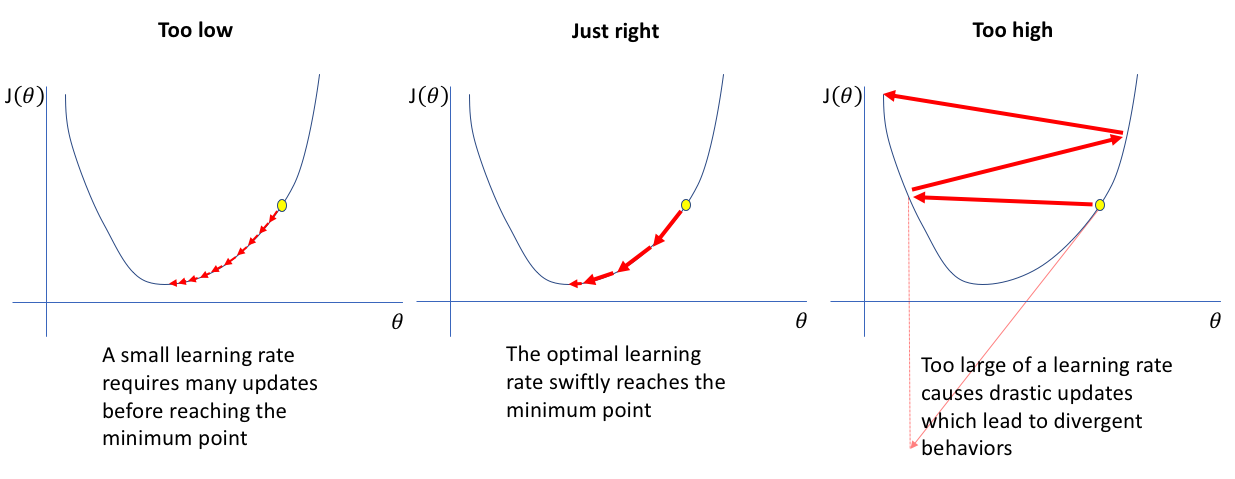


In [28]:
# LearningRateScheduler

lrs = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [29]:
# ReduceLRonPlateau
rlp = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

## **c) Training the model**

In [31]:
%%time
batch_size = 64
epochs = 25

# Fit the Model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_validation,y_validation), verbose=1, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [lrs])

Epoch 1/25
590/590 [==============================] - 21s 35ms/step - loss: 0.3799 - accuracy: 0.8902 - val_loss: 0.1331 - val_accuracy: 0.9602
Epoch 2/25
590/590 [==============================] - 14s 23ms/step - loss: 0.1320 - accuracy: 0.9604 - val_loss: 0.0640 - val_accuracy: 0.9798
Epoch 3/25
590/590 [==============================] - 14s 23ms/step - loss: 0.0981 - accuracy: 0.9706 - val_loss: 0.0367 - val_accuracy: 0.9862
Epoch 4/25
590/590 [==============================] - 14s 23ms/step - loss: 0.0763 - accuracy: 0.9762 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 5/25
590/590 [==============================] - 14s 23ms/step - loss: 0.0736 - accuracy: 0.9781 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 6/25
590/590 [==============================] - 14s 23ms/step - loss: 0.0638 - accuracy: 0.9808 - val_loss: 0.0332 - val_accuracy: 0.9886
Epoch 7/25
590/590 [==============================] - 14s 23ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.1102 - val_accuracy:

# **5. Model evaluation**

## **a) Plotting train vs validation curves**

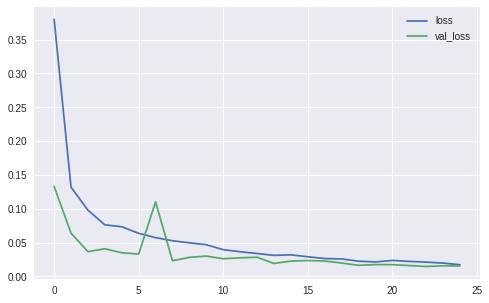

In [32]:
result = pd.DataFrame(model.history.history)
# Plotting train 'loss' vs 'val_loss'
result[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

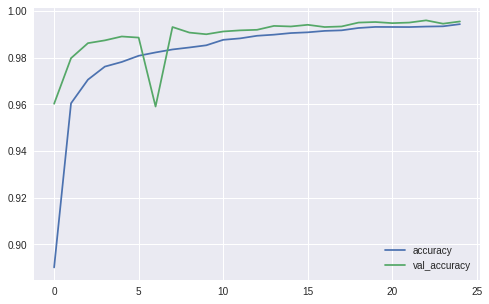

In [33]:
# Plotting train 'accuracy' vs 'val_accuracy'
result[['accuracy','val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## **b) Evaluating model on validation set**

In [34]:
model.evaluate(X_validation, y_validation)

4200/4200 [==============================] - 1s 121us/step


[0.015609815099423507, 0.9954761862754822]

################ CLASSIFICATION REPORT ################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       438
           2       1.00      1.00      1.00       424
           3       1.00      1.00      1.00       407
           4       0.99      0.99      0.99       384
           5       1.00      1.00      1.00       400
           6       1.00      0.99      1.00       403
           7       0.99      1.00      1.00       431
           8       0.99      0.99      0.99       431
           9       0.99      0.99      0.99       456

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200
 


################ CONFUSION MATRIX ################


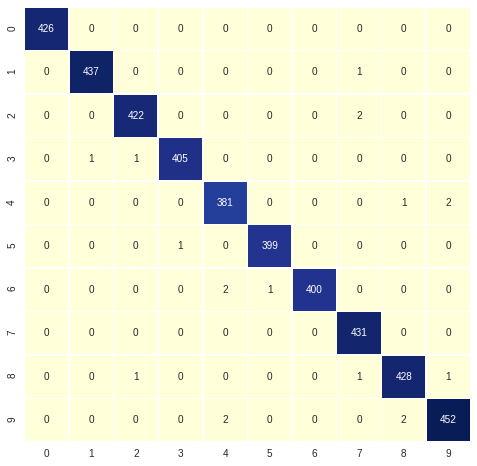

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

# Instead of probabilities it provides class labels
y_pred_classes = model.predict_classes(X_validation)

# Reverting one-hot encoding on true validation output labels
y_test_classes = np.argmax(y_validation,axis=1)
print("################ CLASSIFICATION REPORT ################")
print(classification_report(y_test_classes,y_pred_classes),"\n\n")
print("################ CONFUSION MATRIX ################")
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_classes,y_pred_classes),linewidths=.5,cmap="YlGnBu",annot=True,cbar=False,fmt='d')
plt.show()

# **6. Performing prediction on unseen data**

In [36]:
# Performing prediction on unseen data
pred_digits_test = np.argmax(model.predict(X_test),axis=1)
# alternate method : pred_digits_test = model.predict_classes(X_test)

# Saving result to .csv file for final submission
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/answer.csv',index=False)

# **7.Miscellaneous**

## **a) Saving Model**

In [37]:
# To save model
model.save('/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/my_model.h5')

In [38]:
import tensorflow,keras
# Make sure the version of tensorflow and keras is same if the model is loaded on a different system
print(tensorflow.__version__)
print(keras.__version__)

2.1.0
2.3.1


In [39]:
from keras.models import load_model
# To load model
model_new = load_model('/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/my_model.h5')

# Evaluating the performance of loaded model
model_new.evaluate(X_validation, y_validation)

4200/4200 [==============================] - 1s 141us/step


[0.015609815099423507, 0.9954761862754822]

## **b) Generating Model Diagram**

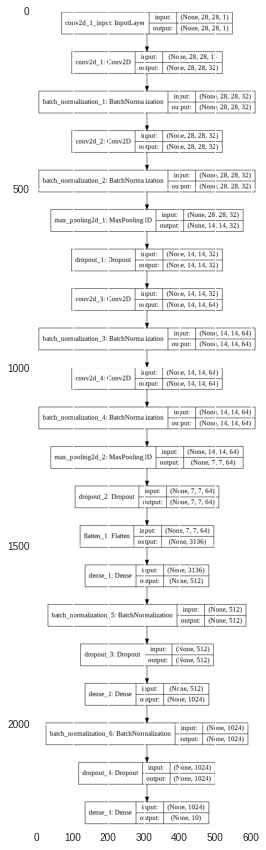

In [40]:
from keras.utils import plot_model

# Save our model diagrams to this path
model_diagrams_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle_Digit_Recognizer(CNN)/'

# Generate the plot
plot_model(model_new, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = plt.imread(model_diagrams_path + 'model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 

## **b) Acknowledgements**
**Reference Kernels:**

* Chinmay's kernel: https://www.kaggle.com/fuzzywizard/beginners-guide-to-cnn-accuracy-99-7#4)-Training-Convolutional-Neural-Network

* Yassine's kernel: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6